## Part A - 30 Marks

### • DOMAIN: 
Electronics and Telecommunication

### • CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals.Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various 

### • DATA DESCRIPTION: The data set contains information on various signal tests performed:

1. Parameters: Various measurable signal parameters.

2. Signal_Quality: Final signal strength or quality

### PROJECT OBJECTIVE: 

To build a classifier which can use the given parameters to determine the signal strength or quality.

#### Steps and tasks: [ Total Score: 30 Marks]

#### 1. Data import and Understanding [10 Marks]

A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]

B. Check for missing values and print percentage for each attribute. [2 Marks]

C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]

D. Visualise distribution of the target variable. [2 Marks]

E. Share insights from the initial data analysis (at least 2). [2 Marks]

### 2. Data preprocessing [7 Marks]

A. Split the data into X & Y. [1 Marks]

B. Split the data into train & test with 70:30 proportion.[1 Marks]

C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

D. Normalise the train and test data with appropriate method. [2 Marks]

E. Transform Labels into format acceptable by Neural Network [2 Marks]

### 3. Model Training & Evaluation using Neural Network [13 Marks]

A. Design a Neural Network to train a classifier. [3 Marks]

B. Train the classifier using previously designed Architecture [2 Marks]

C. Plot 2 separate visuals. [3 Marks]

    i. Training Loss and Validation Loss

    ii. Training Accuracy and Validation Accuracy

D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

## 1. Data import and Understanding [10 Marks]


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]

df = pd.read_csv('NN Project Data - Signal.csv')
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# B. Check for missing values and print percentage for each attribute. [2 Marks]
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print("Percentage of missing values for each attribute:")
print(percentage_missing)

Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [6]:
# C. Check for presence of duplicate records in the dataset and impute with appropriate method
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)
df.drop_duplicates()

Number of duplicate records: 240


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


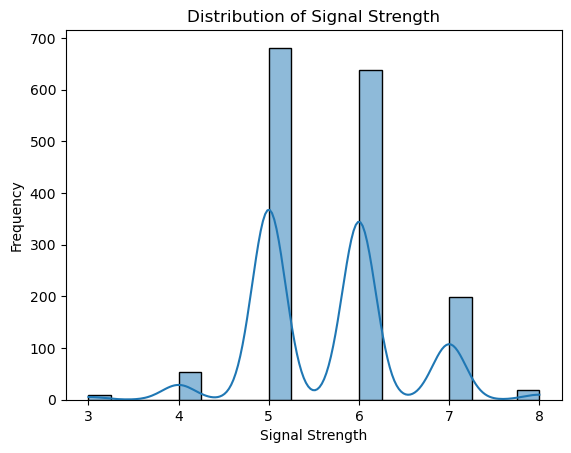

In [8]:
# D. Visualize distribution of the target variable
sns.histplot(df['Signal_Strength'], bins=20, kde=True)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

### E. Share insights from the initial data analysis

1. **Normal Distribution of Signal Strength**: 

    The distribution of signal Strength appears to be approximately normal, as seen from the histogram. This suggests that the signal Strength values are evenly distributed across different levels, which is a good characteristic for modeling.

2. **Data Completeness**: 
    
    There are no missing values in the dataset for any of the attributes. This indicates that the dataset is complete, and there is no need for imputation or handling missing data.

These insights provide a foundational understanding of the dataset and its characteristics, which will be crucial for further data preprocessing and model development stages.

## 2. Data preprocessing [7 Marks]

In [12]:
# A. Split the data into X & Y. [1 Marks]

# Splitting the data into features (X) and target variable (Y)
X = df.drop('Signal_Strength', axis=1)  # Features excluding the target variable
Y = df['Signal_Strength']  # Target variable

# Check the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (1599, 11)
Shape of Y: (1599,)


In [13]:
# B. Split the data into train & test with 70:30 proportion.[1 Marks]

from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets with a 70:30 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Check the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (1119, 11)
Shape of X_test: (480, 11)
Shape of Y_train: (1119,)
Shape of Y_test: (480,)


In [14]:
# C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

# Print shape of all the four variables
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data are in sync
if len(X_train) + len(X_test) == len(X) and len(Y_train) + len(Y_test) == len(Y):
    print("Train and test data are in sync.")
else:
    print("Train and test data are not in sync.")


Shape of X_train: (1119, 11)
Shape of X_test: (480, 11)
Shape of Y_train: (1119,)
Shape of Y_test: (480,)
Train and test data are in sync.


In [15]:
# D. Normalise the train and test data with appropriate method. [2 Marks]

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)


In [16]:
# E. Transform Labels into format acceptable by Neural Network [2 Marks]

from keras.utils import to_categorical

# Transform labels into format acceptable by Neural Network
Y_train_categorical = to_categorical(Y_train)
Y_test_categorical = to_categorical(Y_test)


## 3. Model Training & Evaluation using Neural Network [13 Marks]¶

In [22]:
# A. Design a Neural Network to train a classifier. [3 Marks]

from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialize the neural network model
model = Sequential()

# Add input layer (first hidden layer)
model.add(Dense(64, input_dim=X_train_normalized.shape[1], activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add hidden layers
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(Y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# B. Train the classifier using previously designed Architecture [2 Marks]

history = model.fit(X_train_normalized, Y_train_categorical, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test_normalized, Y_test_categorical))


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5186 - loss: 1.0760 - val_accuracy: 0.5500 - val_loss: 1.0138
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.0411 - val_accuracy: 0.5542 - val_loss: 1.0053
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5865 - loss: 0.9827 - val_accuracy: 0.5542 - val_loss: 0.9964
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5911 - loss: 1.0474 - val_accuracy: 0.5562 - val_loss: 0.9933
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5522 - loss: 1.0627 - val_accuracy: 0.5604 - val_loss: 0.9947
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5607 - loss: 1.0162 - val_accuracy: 0.5562 - val_loss: 0.9900
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5572 - loss: 1.0241 - val_accuracy: 0.5542 - val_loss: 0.9814
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5883 - loss: 1.0181 - val_accuracy: 0.5750 - val_loss:

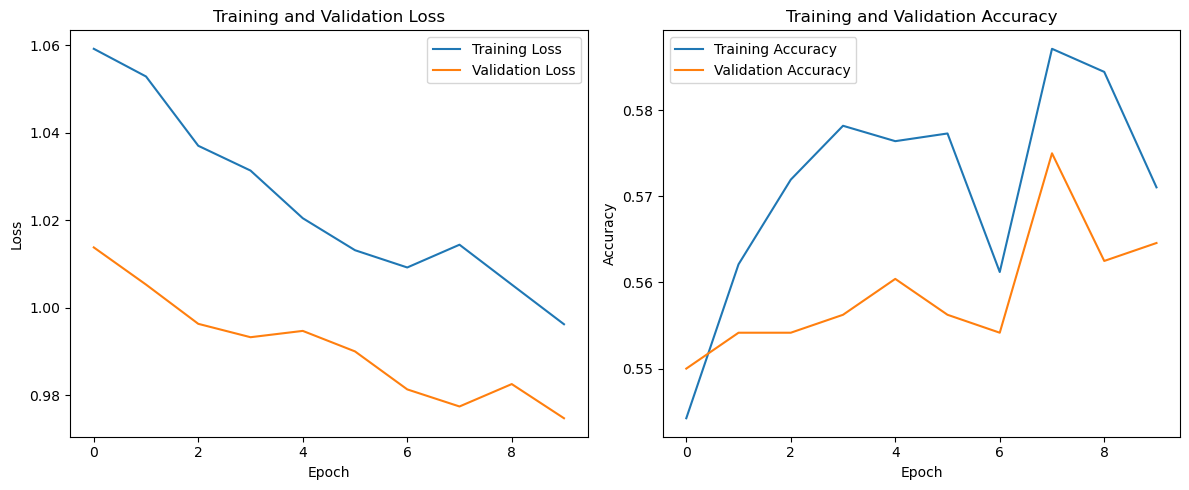

In [30]:
# C. Plot 2 separate visuals. [3 Marks]

import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

# Initialize the neural network model
model = Sequential()

# Add input layer (first hidden layer)
model.add(Dense(128, input_dim=X_train_normalized.shape[1], activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(Y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,169 (47.54 KB)

 Trainable params: 12,169 (47.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3029 - loss: 1.9943 - val_accuracy: 0.4167 - val_loss: 1.3173
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4132 - loss: 1.2748 - val_accuracy: 0.5042 - val_loss: 1.1808
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5495 - loss: 1.1208 - val_accuracy: 0.5188 - val_loss: 1.0974
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5389 - loss: 1.0993 - val_accuracy: 0.5188 - val_loss: 1.0571
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5452 - loss: 1.0682 - val_accuracy: 0.5333 - val_loss: 1.0385
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5543 - loss: 1.0369 - val_accuracy: 0.5708 - val_loss: 1.0110
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5771 - loss: 1.0369 - val_accuracy: 0.5125 - val_loss: 1.0147
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5764 - loss: 0.9807 - val_accuracy: 0.5292 - val_loss

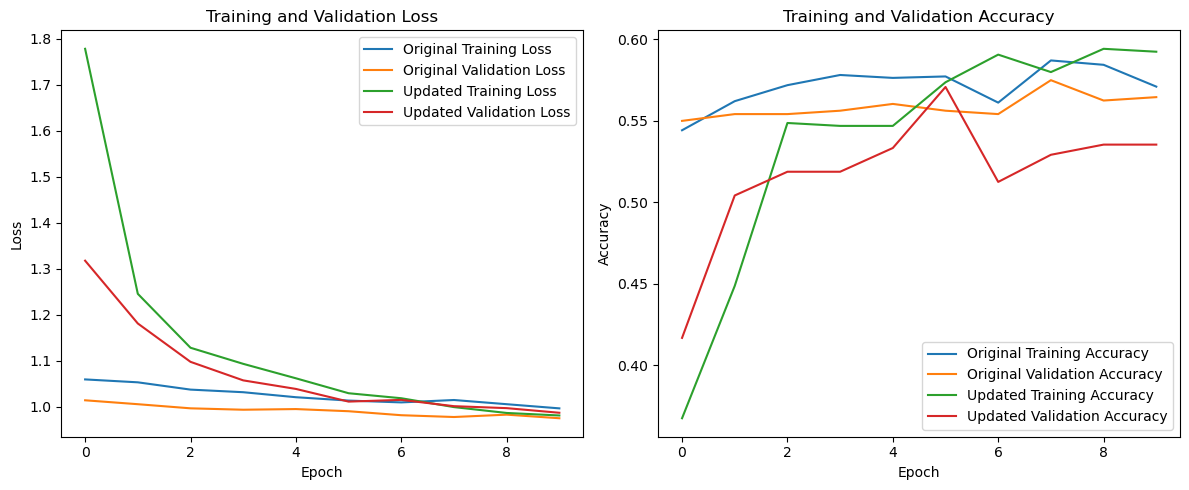

In [34]:
# E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

import matplotlib.pyplot as plt

# Train the updated classifier
history_updated = model.fit(X_train_normalized, Y_train_categorical, 
                            epochs=10, 
                            batch_size=32, 
                            validation_data=(X_test_normalized, Y_test_categorical))

# Plot training loss and validation loss for both models
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Original Training Loss')
plt.plot(history.history['val_loss'], label='Original Validation Loss')
plt.plot(history_updated.history['loss'], label='Updated Training Loss')
plt.plot(history_updated.history['val_loss'], label='Updated Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy for both models
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Original Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_updated.history['accuracy'], label='Updated Training Accuracy')
plt.plot(history_updated.history['val_accuracy'], label='Updated Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Part B - 30 Marks

### • DOMAIN: 

Autonomous Vehicles

### • CONTEXT: 
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of 
millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

### • DATA DESCRIPTION: 

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.

The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

### • PROJECT OBJECTIVE: 

To build a digit classifier on the SVHN (Street View Housing Number) dataset.

Steps and tasks: [ Total Score: 30 Marks]

### 1. Data Import and Exploration [5 Marks]

A. Read the .h5 file and assign to a variable. [2 Marks]

B. Print all the keys from the .h5 file. [1 Marks]

C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

### 2. Data Visualisation and preprocessing [13 Marks]

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

E. Transform Labels into format acceptable by Neural Network [2 Marks]

F. Print total Number of classes in the Dataset. [1 Marks]

### 3. Model Training & Evaluation using Neural Network [12 Marks]

A. Design a Neural Network to train a classifier. [3 Marks]

B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

C. Evaluate performance of the model with appropriate metrics. [2 Marks]

D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

### 1. Data Import and Exploration [5 Marks]¶

In [43]:
# A. Read the .h5 file and assign to a variable. [2 Marks]
import h5py

# File path
file_path = r"C:\Users\Santosh\Downloads\GL-Python\Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, 'r') as f:
    # List all datasets in the file
    for dataset_name in f:
        print(dataset_name)


X_test
X_train
X_val
y_test
y_train
y_val


In [44]:
import h5py

# File path
file_path = r"C:\Users\Santosh\Downloads\GL-Python\Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, 'r') as f:
    # Read the arrays
    X_test = f['X_test'][:]
    X_train = f['X_train'][:]
    X_val = f['X_val'][:]
    y_test = f['y_test'][:]
    y_train = f['y_train'][:]
    y_val = f['y_val'][:]


In [45]:
# B. Print all the keys from the .h5 file. [1 Marks]

import h5py

# File path
file_path = r"C:\Users\Santosh\Downloads\GL-Python\Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, 'r') as f:
    # Print all keys
    print("Keys in the HDF5 file:")
    for key in f.keys():
        print(key)


Keys in the HDF5 file:
X_test
X_train
X_val
y_test
y_train
y_val


In [46]:
# C. Split the data into X_train, X_test, Y_train, Y_test [2 Mark]

# Assuming X_train, X_test, y_train, y_test are already loaded from the .h5 file

# Import necessary library
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the data to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (33600, 32, 32)
X_test shape: (8400, 32, 32)
y_train shape: (33600,)
y_test shape: (8400,)


### 2. Data Visualisation and preprocessing [13 Marks]

In [50]:
# A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Verify if X and y are in sync
if X_train.shape[0] == y_train.shape[0]:
    print("Training data: X and y are in sync.")
else:
    print("Training data: X and y are NOT in sync.")

if X_test.shape[0] == y_test.shape[0]:
    print("Testing data: X and y are in sync.")
else:
    print("Testing data: X and y are NOT in sync.")


X_train shape: (33600, 32, 32)
y_train shape: (33600,)
X_test shape: (8400, 32, 32)
y_test shape: (8400,)
Training data: X and y are in sync.
Testing data: X and y are in sync.


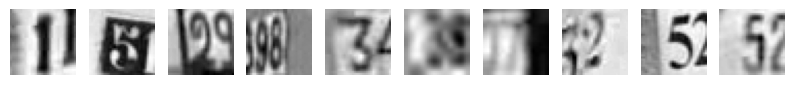

Corresponding labels for the first 10 images:
[1 5 2 8 3 3 7 2 5 5]


In [51]:
# B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

import matplotlib.pyplot as plt

# Visualize the first 10 images in the training data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the corresponding labels
print("Corresponding labels for the first 10 images:")
print(y_train[:10])


In [52]:
# C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

# Define the new shape of the images
new_height = 32
new_width = 32
num_channels = 1  # Assuming grayscale images

# Reshape the training data
X_train = X_train.reshape(-1, new_height, new_width, num_channels)

# Reshape the testing data
X_test = X_test.reshape(-1, new_height, new_width, num_channels)

# Print the shape of the reshaped data to verify
print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_test after reshaping:", X_test.shape)


Shape of X_train after reshaping: (33600, 32, 32, 1)
Shape of X_test after reshaping: (8400, 32, 32, 1)


In [53]:
# D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Print the minimum and maximum pixel values after normalization
print("Minimum pixel value after normalization:", X_train.min())
print("Maximum pixel value after normalization:", X_train.max())


Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 0.9999


In [54]:
# E. Transform Labels into format acceptable by Neural Network [2 Marks]
import tensorflow as tf

# Transform labels into one-hot encoded format
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Print the shape of the transformed labels to verify
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)



Shape of y_train_encoded: (33600, 10)
Shape of y_test_encoded: (8400, 10)


In [55]:
# F. Print total Number of classes in the Dataset. [1 Marks]

# Find the total number of classes in the dataset
num_classes = len(set(y_train.tolist() + y_test.tolist()))

# Print the total number of classes
print("Total number of classes in the dataset:", num_classes)


Total number of classes in the dataset: 10


### 3. Model Training & Evaluation using Neural Network [12 Marks]

In [57]:
# A. Design a Neural Network to train a classifier. [3 Marks]
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 1)),  # Input layer specifying the shape of the input data
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,994 (476.54 KB)

 Trainable params: 121,994 (476.54 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

# Train the classifier
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.3484 - loss: 1.8099 - val_accuracy: 0.8014 - val_loss: 0.6788
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8268 - loss: 0.6072 - val_accuracy: 0.8332 - val_loss: 0.5677
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8602 - loss: 0.4717 - val_accuracy: 0.8682 - val_loss: 0.4540
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8874 - loss: 0.3885 - val_accuracy: 0.8892 - val_loss: 0.4041
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.8966 - loss: 0.3479 - val_accuracy: 0.8893 - val_loss: 0.3925
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9085 - loss: 0.3160 - val_accuracy: 0.8983 - val_loss: 0.3591
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9182 - loss: 0.2786 - val_accuracy: 0.8933 - val_loss: 0.3744
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9225 - loss: 0.2585 - 

In [61]:
# C. Evaluate performance of the model with appropriate metrics. [2 Marks]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the probabilities for each class for the test set
y_pred_probs = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = tf.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_categorical = tf.argmax(y_test_encoded, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_categorical, y_pred)
precision = precision_score(y_test_categorical, y_pred, average='weighted')
recall = recall_score(y_test_categorical, y_pred, average='weighted')
f1 = f1_score(y_test_categorical, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_categorical, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.903452380952381
Precision: 0.904970066760934
Recall: 0.903452380952381
F1 Score: 0.9035439958431045
Confusion Matrix:
[[789  12   8   7   1   1   7   2   3   3]
 [ 14 793   9   8  13   3   6  12   3   0]
 [  6   4 770  10   4   1   1  12   6   6]
 [  6   8  17 782   5  27   4   7  14   4]
 [ 11  30  12  13 753   1   6   1   5   6]
 [  7   4   6  29   6 739  27   4   6   8]
 [ 25   3   2  13   6  21 747   3  16   3]
 [  4  23  20   6   4   1   3 772   2   5]
 [ 17  12  13  31   6   5  17   2 702  11]
 [ 39   4  18  14   2   8   1   4  11 742]]


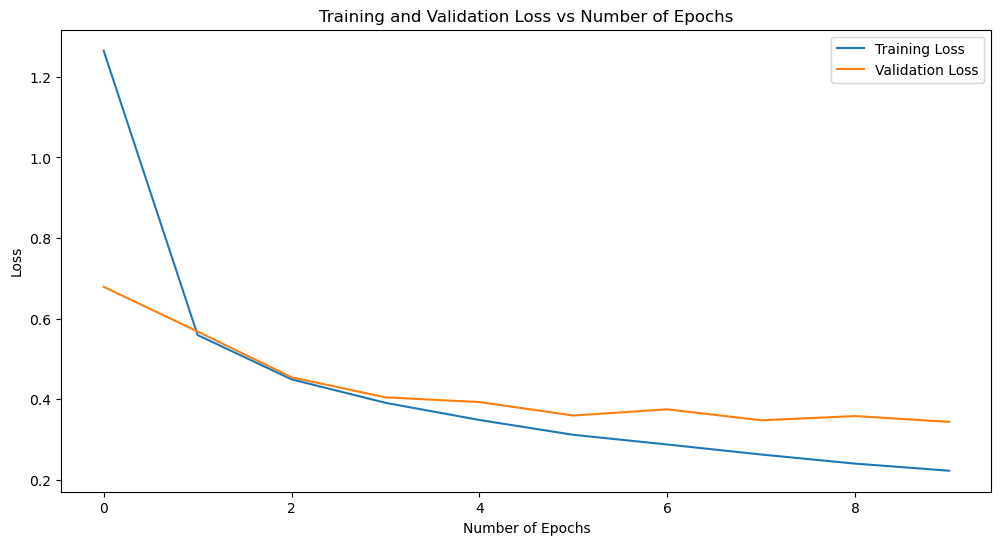

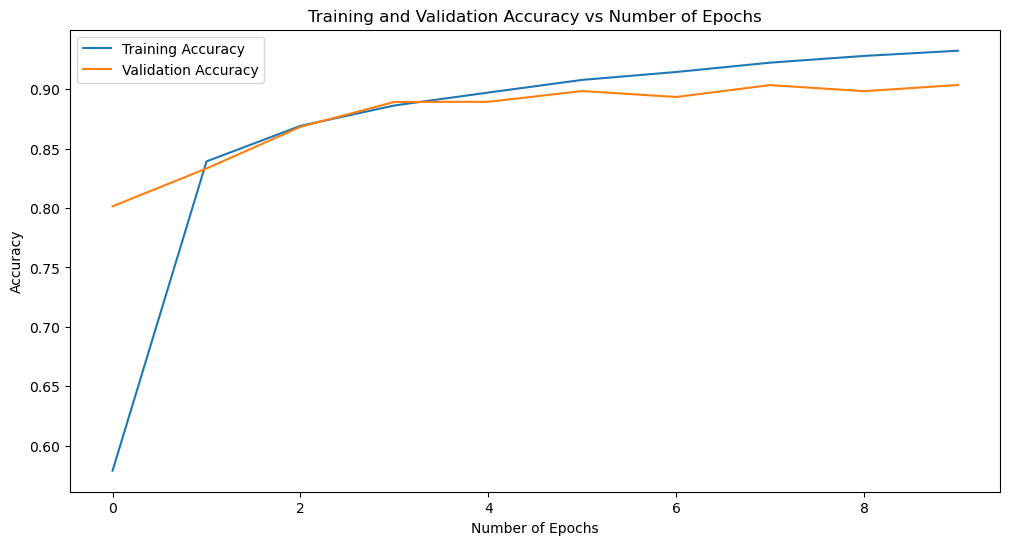

In [62]:
# D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
# observations on the same. [4 Marks]

import matplotlib.pyplot as plt

# Plot training loss vs number of epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy vs number of epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

